In [46]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [47]:
training_x_segments = np.load('norwegian_train_x_segmented.npy')
training_y_segments = np.load('norwegian_train_y_segmented.npy')
testing_x_segments = np.load('norwegian_test_x_segmented.npy')
testing_y_segments = np.load('norwegian_test_y_segmented.npy')

In [48]:
X_train, y_train = np.array(training_x_segments), np.array(training_y_segments)


X_test, y_test = np.array(testing_x_segments), np.array(testing_y_segments)
    
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2],1)
#X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2],1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(214913, 128, 10, 1)
(214913,)
(2922, 128, 10, 1)


In [49]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 10, 1)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 8, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 63, 4, 32)        0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 8064)              0         
                                                                 
 dense_16 (Dense)            (None, 64)                516160    
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 516,545
Trainable params: 516,545
Non-trainable params: 0
________________________________________________

In [50]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics='accuracy')
              
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/3
6717/6717 [==============================] - 50s 7ms/step - loss: 1.5527 - accuracy: 0.7786
Epoch 2/3
6717/6717 [==============================] - 53s 8ms/step - loss: 0.8299 - accuracy: 0.8550
Epoch 3/3
6717/6717 [==============================] - 52s 8ms/step - loss: 0.7514 - accuracy: 0.8726


In [52]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

92/92 - 0s - loss: 1.3924 - accuracy: 0.8737 - 230ms/epoch - 2ms/step


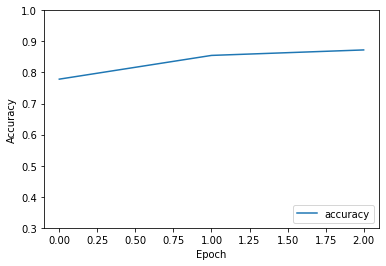

In [53]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')